train/test split
    - want to be equivalent in ways that are important (context)
    - careful of leakage
    - actually need a third for hyperparameter tuning

loss functions
    - mse - estiamtes your mean given feature values
    - mae - conditional median of y given feats
    - could log transform the responses and then do mse (msle) - gets the ratio of your pred/true log(y_hat) - log(y) --- do this if your response var spans several orders of magnitude
    
regularization
    - why
    - how for each

Creating the models
    - what kind of model would you use and why (linear or non linear, tree etc)
    
Further improvements
    - Occams razor: simplest model is best
    - Pruning feature space: this can come with feature importance step after first training model, removing those with the least amount of signal added
    
Hypertune the model

interpretting the outputs
    - Matt’s got me looking into Shap values but I haven’t gotten around to fully grok-ing them yet
    - trees: 
    - partial dependence plots
        - d

scoring/evaluating the model
    - r2 - not always a useful metric since it is hard to know what the irreducible error is

monitoring the model's performance
    - trees will not extrapolate (they... interpolate) in the time dimension so you need to keep training them (otherwise they will drift without seeing new data)
    - experimentation when deployed perhaps (think both guardrail AND success metrics)    

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

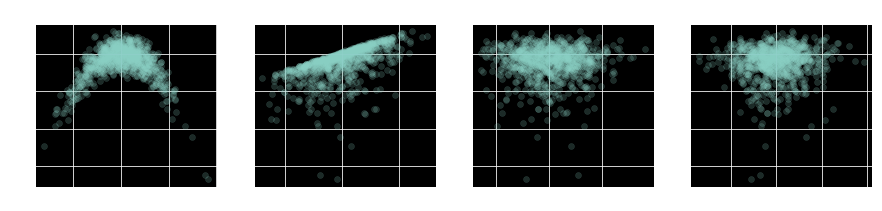

In [25]:
N = 1000
n_feats = 4
fake_data = np.random.normal(size=(N, n_feats))

# we'll make two of them useful and the others redundant
x1 = fake_data[:,0]
x2 = fake_data[:,1]
y = -5*x1**2 + 5 * x2 + 1 + np.random.normal(size = N, scale = 0.3)
fig, axes = plt.subplots(1, n_feats, figsize = (15,3))
for idx in range(n_feats):
    axes[idx].scatter(fake_data[:,idx],y, alpha=0.2)
    axes[idx].set_title(f'x{idx+1}')